# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [2]:
!ls -lha /workspace/DLND/data/__datasets

total 220K
drwxrwxr-x   11 1000 1000 4.0K Sep 21 06:47 .
drwxrwxr-x    5 1000 1000 4.0K Sep 21 06:45 ..
drwxr-xr-x    3 1000 1000 4.0K Sep 11 15:09 CIFAR10
drwxrwxr-x    4 1000 1000 4.0K Sep 21 06:47 Cat_Dog_data
drwxr-xr-x    4 1000 1000 4.0K Sep 20 12:47 FashionMNIST
drwxr-xr-x    4 1000 1000 4.0K Jun 18 19:31 MNIST
drwxrwxr-x    2 1000 1000 4.0K Sep 21 06:47 _X_downloaded
drwxr-xr-x    5 1000 1000 4.0K Mar 27  2017 dogImages
drwxrwxr-x    4 1000 1000 4.0K Sep 21 06:47 flower_photos
drwxrwxr-x    5 1000 1000 4.0K Jul 29 11:53 flowers
drwxr-xr-x 5751 1000 1000 176K Oct 11  2007 lfw


In [3]:
datasetroot = '/workspace/DLND/data/__datasets/'

In [4]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob(datasetroot+"lfw/*/*"))
dog_files = np.array(glob(datasetroot+"dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


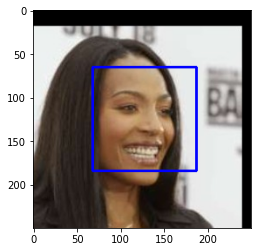

In [5]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [6]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

100% of human images are detected as face. 11% of dog images are detected as face.

In [7]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## DONE: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

faces_human = 0
faces_dog = 0

for human_file in human_files_short:
    if face_detector(human_file):
        faces_human += 1
        
for dog_file in dog_files_short:
    if face_detector(dog_file):
        faces_dog += 1
        
print("Human faces detected in human images: {:.2f}%".format(faces_human/len(human_files_short) * 100))
print("Human faces detected in dog images:   {:.2f}%".format(faces_dog/len(dog_files_short) * 100))

Human faces detected in human images: 100.00%
Human faces detected in dog images:   11.00%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [8]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [9]:
!nvidia-smi

Tue Sep 21 17:05:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA Quadro P...  On   | 00000000:08:00.0 Off |                  Off |
| 28%   37C    P8     6W / 180W |     11MiB / 16278MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [10]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

In [11]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](https://pytorch.org/vision/stable/models.html).

In [12]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## DONE: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # load PIL image data
    image = Image.open(img_path).convert('RGB')
    
    # transofrmations for prediction
    predict_transforms = transforms.Compose([transforms.Resize(256),
                                             transforms.CenterCrop(224),
                                             transforms.ToTensor(),
                                             transforms.Normalize((0.485, 0.456, 0.406),
                                                                  (0.229, 0.224, 0.225))])
    
    # run transformations on the input image
    image = predict_transforms(image)[:3,:,:].unsqueeze(0)
    
    # move input data to destination device
    if use_cuda:
        image = image.cuda()
        
    # set model to evaluation
    VGG16.eval()
    
    # get output from prediction = class ids
    output = VGG16(image)
    
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())
    
    return preds.item() # predicted class index

In [13]:
VGG16_predict(dog_files_short[0])

180

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [14]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## DONE: Complete the function.
    
    pred = VGG16_predict(img_path)
    
    return (pred >= 151 and pred <= 268) # true/false

In [15]:
dog_detector(dog_files_short[0])

True

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

0% of human images are detected as dogs. 95% of dog images are detected as dog.


In [16]:
### DONE: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

dogs_detected_in_human_imgs = 0
dogs_detected_in_dog_imgs = 0

for human_file in human_files_short:
    if dog_detector(human_file):
        dogs_detected_in_human_imgs += 1
        
for dog_file in dog_files_short:
    if dog_detector(dog_file):
        dogs_detected_in_dog_imgs += 1
        
print("Dogs detected in human images: {:.2f}%".format(dogs_detected_in_human_imgs/len(human_files_short) * 100))
print("Dogs detected in dog images:   {:.2f}%".format(dogs_detected_in_dog_imgs/len(dog_files_short) * 100))

Dogs detected in human images: 0.00%
Dogs detected in dog images:   95.00%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [17]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [18]:
import os
from torchvision import datasets

### DONE: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

datadir     = datasetroot + 'dogImages'

train_dir   = datadir + '/train'
valid_dir   = datadir + '/valid'
test_dir    = datadir + '/test'

# Define your transforms for the training, validation, and testing sets
train_transforms = transforms.Compose([transforms.RandomRotation(45),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

valid_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# Load the datasets with ImageFolder
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
valid_dataset = datasets.ImageFolder(valid_dir, transform=valid_transforms)
test_dataset  = datasets.ImageFolder(test_dir,  transform=test_transforms)

# Using the image datasets and the trainforms, define the dataloaders
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size=64, shuffle=True)
test_dataloader  = torch.utils.data.DataLoader(test_dataset,  batch_size=64, shuffle=False)

loaders_scratch = {'train': train_dataloader,
                   'valid': valid_dataloader,
                   'test':  test_dataloader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 

Images are resized to 255 pixel and center croped afterwards to 224. I choosed this technique to have same input data as for models trained for ImageNet.

After resize and crop I am converting data to pytorch tensor. Last step is to normalize them - again, to have same input data as for ImageNet models, I am using normalization as required byt those models.

Training data are also augmented by applying random rotation and horizontal flip.

Train and Valid datasets are shuffled, to ensure some randomnes between epics, while test data stays in same order.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [19]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### DONE: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        self.conv1   = nn.Conv2d(3, 64, 5, padding=2)
        self.conv2_1 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3_1 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv4   = nn.Conv2d(256, 512, 3, padding=1)
        
        self.pool  = nn.MaxPool2d(2, 2)
        
        self.fc1   = nn.Linear(512 * 14 * 14, 2048)
        self.fc2   = nn.Linear(2048, 512)
        self.fc3   = nn.Linear(512, 133)
        
        self.dropout = nn.Dropout(p=0.25)
    
    def forward(self, x):
        ## Define forward behavior
        
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2_1(x))
        x = self.pool(x)
        x = F.relu(self.conv3_1(x))
        x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        
        # flatten all dimensions except batch
        x = torch.flatten(x, 1)
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

Implementation is based on VGG architecture, with exception of several Conv2D layers between MaxPool2d. Starting with 4 convulutional layers which are reducing input volume from 224x244x3 to 14x14x512.

After that 3 fully connected linear layers with ReLU activation and 25% dropouts.

Convolution layers are one by one selecting more and more complex features while max pooling layers are reducing x-y dimensionality of the data. After last maxpool data weights flatten in order to fully connect them to first linear layer. In total 3 fully connected linear layers with ReLU activation behave as classifier. Added dropout to prevent overfitting.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [20]:
import torch.optim as optim

### DONE: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### DONE: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [21]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear optimizer variables
            optimizer.zero_grad()
            # forward propagation
            output = model(data)
            # calculate loss of current batch
            loss = criterion(output, target)
            # back propagete error
            loss.backward()
            # update weights
            optimizer.step()
            
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            # forward pass
            output = model(data)
            # calculate loss
            loss = criterion(output, target)
            
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## DONE: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.889399 	Validation Loss: 4.888807
Validation loss decreased (inf --> 4.888807).  Saving model ...
Epoch: 2 	Training Loss: 4.887736 	Validation Loss: 4.885706
Validation loss decreased (4.888807 --> 4.885706).  Saving model ...
Epoch: 3 	Training Loss: 4.885707 	Validation Loss: 4.885787
Epoch: 4 	Training Loss: 4.883337 	Validation Loss: 4.877668
Validation loss decreased (4.885706 --> 4.877668).  Saving model ...
Epoch: 5 	Training Loss: 4.879827 	Validation Loss: 4.872602
Validation loss decreased (4.877668 --> 4.872602).  Saving model ...
Epoch: 6 	Training Loss: 4.877038 	Validation Loss: 4.881652
Epoch: 7 	Training Loss: 4.874707 	Validation Loss: 4.870932
Validation loss decreased (4.872602 --> 4.870932).  Saving model ...
Epoch: 8 	Training Loss: 4.870760 	Validation Loss: 4.875957
Epoch: 9 	Training Loss: 4.866742 	Validation Loss: 4.866658
Validation loss decreased (4.870932 --> 4.866658).  Saving model ...
Epoch: 10 	Training Loss: 4.862550 	Valida

Epoch: 93 	Training Loss: 3.932412 	Validation Loss: 3.923951
Epoch: 94 	Training Loss: 3.945168 	Validation Loss: 3.939916
Epoch: 95 	Training Loss: 3.937121 	Validation Loss: 3.779876
Validation loss decreased (3.855389 --> 3.779876).  Saving model ...
Epoch: 96 	Training Loss: 3.904583 	Validation Loss: 3.928503
Epoch: 97 	Training Loss: 3.894057 	Validation Loss: 3.756209
Validation loss decreased (3.779876 --> 3.756209).  Saving model ...
Epoch: 98 	Training Loss: 3.884363 	Validation Loss: 3.827233
Epoch: 99 	Training Loss: 3.836088 	Validation Loss: 3.863044
Epoch: 100 	Training Loss: 3.846756 	Validation Loss: 3.891465


<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [22]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.867132


Test Accuracy: 13% (117/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [29]:
## DONE: Specify data loaders

loaders_transfer = {'train': train_dataloader,
                    'valid': valid_dataloader,
                    'test':  test_dataloader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [26]:
import torchvision.models as models
import torch.nn as nn

## DONE: Specify model architecture 

# selecting VGG16
model_transfer = models.vgg16(pretrained=True)

# freezing weights
for param in model_transfer.parameters():
    param.requires_grad = False

# exchanging last classifier layer to god breeds dataset
model_transfer.classifier[6] = nn.Linear(model_transfer.classifier[6].in_features, 133)
    
if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

Standard VGG16 model with exchanged last classification fully connected layer to work with dog dataset's 133 classes. Frozen weights of all layers with the exception of the last (new) one.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [27]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.005)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [30]:
# train the model
model_transfer =  train(100, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 4.156182 	Validation Loss: 2.769683
Validation loss decreased (inf --> 2.769683).  Saving model ...
Epoch: 2 	Training Loss: 2.929372 	Validation Loss: 1.859531
Validation loss decreased (2.769683 --> 1.859531).  Saving model ...
Epoch: 3 	Training Loss: 2.324272 	Validation Loss: 1.349957
Validation loss decreased (1.859531 --> 1.349957).  Saving model ...
Epoch: 4 	Training Loss: 2.026553 	Validation Loss: 1.135983
Validation loss decreased (1.349957 --> 1.135983).  Saving model ...
Epoch: 5 	Training Loss: 1.792196 	Validation Loss: 1.014682
Validation loss decreased (1.135983 --> 1.014682).  Saving model ...
Epoch: 6 	Training Loss: 1.687378 	Validation Loss: 0.886451
Validation loss decreased (1.014682 --> 0.886451).  Saving model ...
Epoch: 7 	Training Loss: 1.565041 	Validation Loss: 0.836242
Validation loss decreased (0.886451 --> 0.836242).  Saving model ...
Epoch: 8 	Training Loss: 1.477418 	Validation Loss: 0.716335
Validation loss decreased (0.83624

Epoch: 97 	Training Loss: 0.848606 	Validation Loss: 0.354204
Epoch: 98 	Training Loss: 0.852644 	Validation Loss: 0.331769
Validation loss decreased (0.333544 --> 0.331769).  Saving model ...
Epoch: 99 	Training Loss: 0.876801 	Validation Loss: 0.336928
Epoch: 100 	Training Loss: 0.869785 	Validation Loss: 0.454070


<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [31]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.394296


Test Accuracy: 87% (728/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [35]:
### DONE: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    # load PIL image data
    image = Image.open(img_path).convert('RGB')
    
    # transofrmations for prediction
    predict_transforms = transforms.Compose([transforms.Resize(256),
                                             transforms.CenterCrop(224),
                                             transforms.ToTensor(),
                                             transforms.Normalize((0.485, 0.456, 0.406),
                                                                  (0.229, 0.224, 0.225))])
    
    # run transformations on the input image
    image = predict_transforms(image)[:3,:,:].unsqueeze(0)
    
    # move input data to destination device
    if use_cuda:
        image = image.cuda()
        
    # set model to evaluation
    model_transfer.eval()
    
    # get output from prediction = class ids
    output = model_transfer(image)
    
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())
    
    return class_names[preds.item()]

In [37]:
print(dog_files_short[0])
print(predict_breed_transfer(dog_files_short[0]))

/workspace/DLND/data/__datasets/dogImages/train/039.Bull_terrier/Bull_terrier_02759.jpg
Bull terrier


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [38]:
### DONE: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    if face_detector(img_path):
        print("Hello HUMANOID! Your look-n-feel seems like a {}".format(predict_breed_transfer(img_path)))
    elif dog_detector(img_path):
        print("Hi there DOG! You look like a {}".format(predict_breed_transfer(img_path)))
    else:
        print("ERROR: Given image does not contain human face nor dog!")
    
    # open the image
    image = Image.open(img_path).convert('RGB')
    
    # display the image
    plt.imshow(image)
    plt.show()


Hi there DOG! You look like a Bull terrier


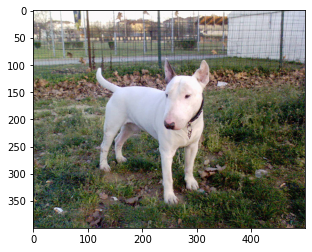

Hi there DOG! You look like a Bull terrier


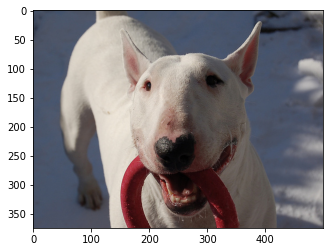

Hi there DOG! You look like a Bull terrier


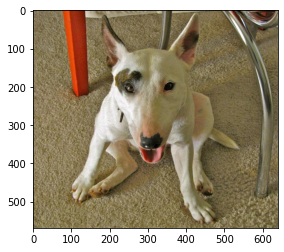

In [40]:
for file in dog_files_short[:3]:
    run_app(file)

Hello HUMANOID! Your look-n-feel seems like a Dachshund


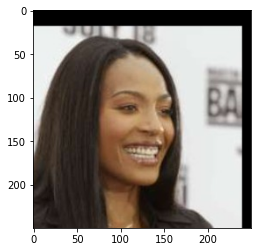

Hello HUMANOID! Your look-n-feel seems like a Chinese crested


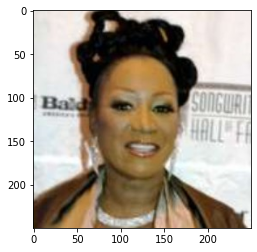

Hello HUMANOID! Your look-n-feel seems like a Chinese crested


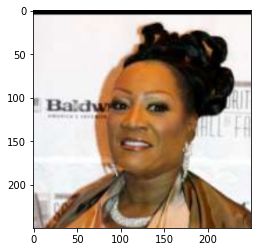

In [41]:
for file in human_files_short[:3]:
    run_app(file)

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

Results are definitelly better than expected! Only worngly guessed image is one dog, which was classified as Malamute instead of Husky.

Improvement proposals:
(1) more accurate dog detector
(2) transfer learning model - re-train whole classifier of VGG16
(3) more data for transfer learning
(4) more GPUs to speed-up training :-)
(5) optimizing image data loading - some data are loaded several time (like run_app)

ERROR: Given image does not contain human face nor dog!


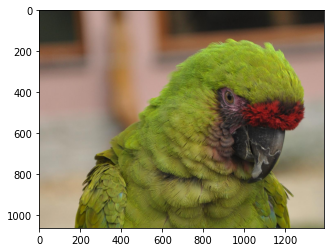

Hello HUMANOID! Your look-n-feel seems like a Chinese crested


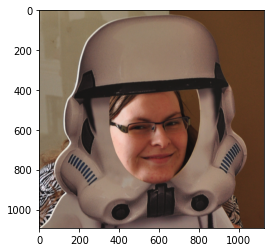

Hi there DOG! You look like a Alaskan malamute


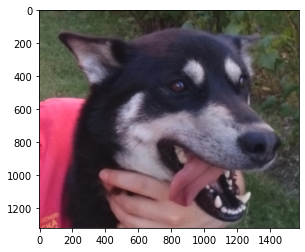

Hello HUMANOID! Your look-n-feel seems like a Bernese mountain dog


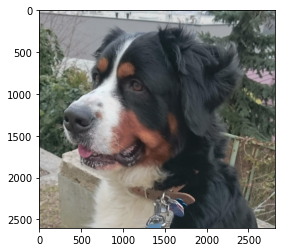

ERROR: Given image does not contain human face nor dog!


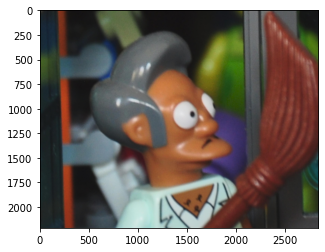

Hello HUMANOID! Your look-n-feel seems like a Komondor


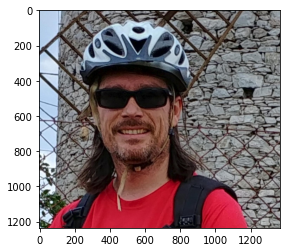

ERROR: Given image does not contain human face nor dog!


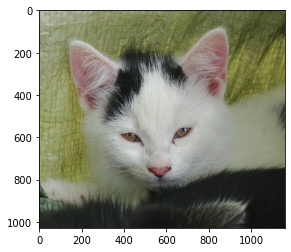

In [42]:
## DONE: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

# load filenames with my images
my_files = np.array(glob(datasetroot+"dlnd_cnn_my_img/*"))


## suggested code, below
for file in my_files:
    run_app(file)